<a href="https://colab.research.google.com/github/LucasLucena001/Kmean_MKT/blob/main/Kmeans_MKT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
data = pd.read_csv('/content/data.csv', encoding='ISO-8859-1')

In [5]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


<ipython-input-6-1258e7cf5694>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=country_counts.index, x=country_counts.values, ax=ax[1, 0], palette='viridis')
<ipython-input-6-1258e7cf5694>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=description_counts.index, x=description_counts.values, ax=ax[1, 1], palette='magma')


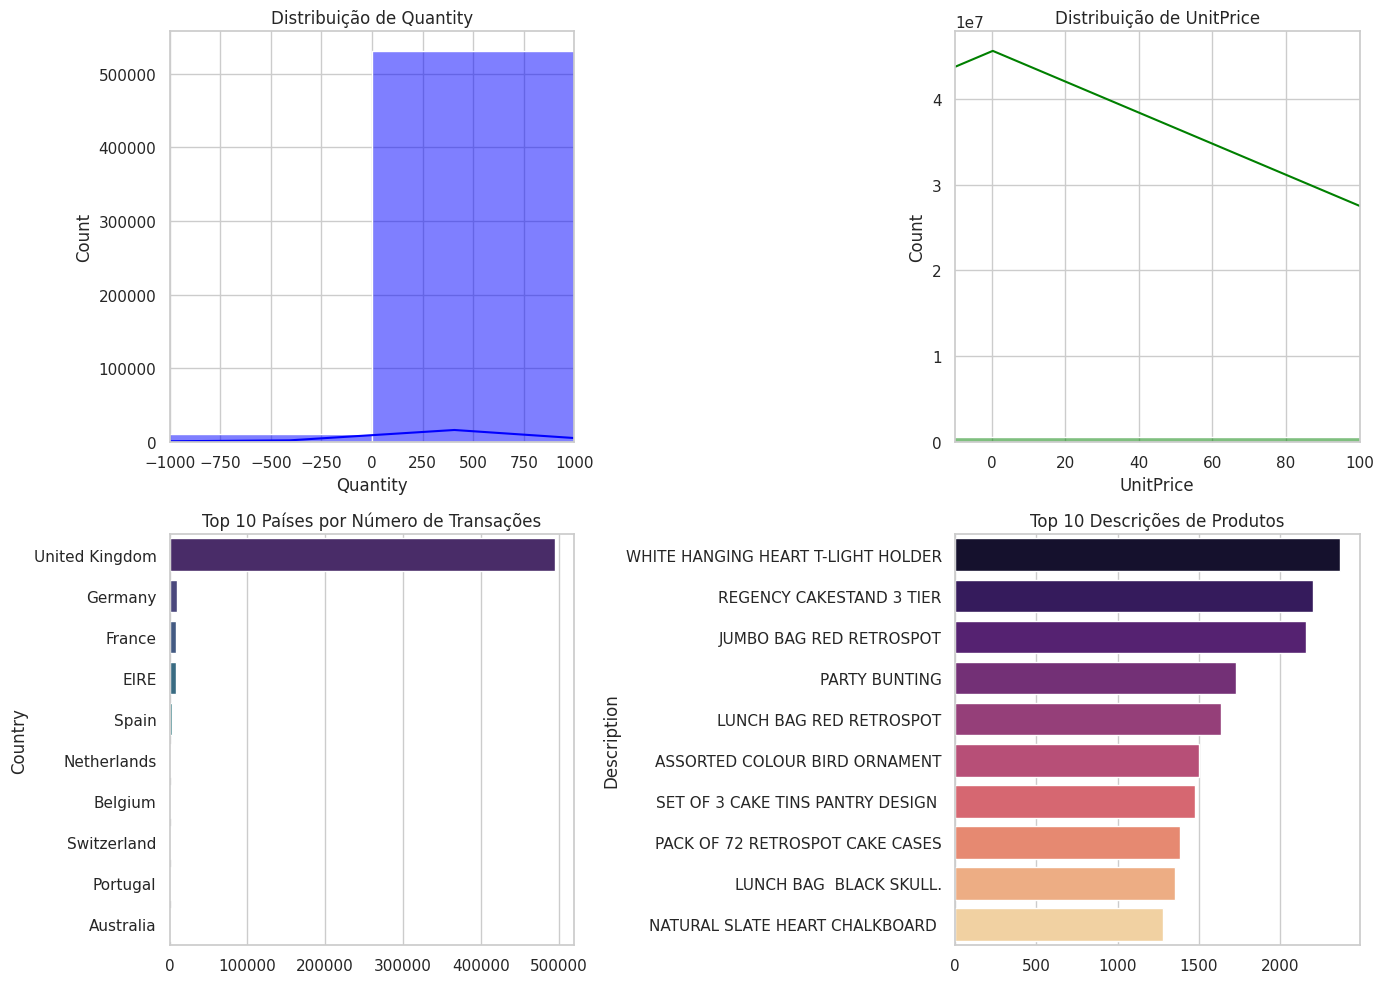

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


fig, ax = plt.subplots(2, 2, figsize=(14, 10))


sns.histplot(data['Quantity'], bins=30, ax=ax[0, 0], kde=True, color='blue')
ax[0, 0].set_title('Distribuição de Quantity')
ax[0, 0].set_xlim(-1000, 1000)


sns.histplot(data['UnitPrice'], bins=30, ax=ax[0, 1], kde=True, color='green')
ax[0, 1].set_title('Distribuição de UnitPrice')
ax[0, 1].set_xlim(-10, 100)


country_counts = data['Country'].value_counts().head(10)  # Top 10 países
sns.barplot(y=country_counts.index, x=country_counts.values, ax=ax[1, 0], palette='viridis')
ax[1, 0].set_title('Top 10 Países por Número de Transações')


description_counts = data['Description'].value_counts().head(10)  # Top 10 descrições
sns.barplot(y=description_counts.index, x=description_counts.values, ax=ax[1, 1], palette='magma')
ax[1, 1].set_title('Top 10 Descrições de Produtos')

plt.tight_layout()
plt.show()


In [7]:

null_data = data.isnull().sum()

duplicate_data = data.duplicated().sum()


quantity_outliers = data[(data['Quantity'] < -1000) | (data['Quantity'] > 1000)]
unitprice_outliers = data[(data['UnitPrice'] < 0) | (data['UnitPrice'] > 100)]


outliers_summary = {
    'Quantity Outliers': len(quantity_outliers),
    'UnitPrice Outliers': len(unitprice_outliers)
}

null_data, duplicate_data, outliers_summary


(InvoiceNo           0
 StockCode           0
 Description      1454
 Quantity            0
 InvoiceDate         0
 UnitPrice           0
 CustomerID     135080
 Country             0
 dtype: int64,
 5268,
 {'Quantity Outliers': 174, 'UnitPrice Outliers': 1038})

In [10]:

data_clean = data.dropna(subset=['CustomerID'])  # Remover registros onde CustomerID é nulo
data_clean['Description'].fillna('No Description', inplace=True)  # Substituir nulos em Description


data_clean = data_clean.drop_duplicates()



data_clean = data_clean[(data_clean['Quantity'].between(-1000, 1000)) & (data_clean['UnitPrice'].between(0, 100))]

data_clean.describe(include='all')


<ipython-input-10-eef999f84cc2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Description'].fillna('No Description', inplace=True)  # Substituir nulos em Description


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,401186,401186,401186,401186.000000,401186,401186.000000,401186.000000,401186
unique,21986,3680,3891,NaN,20293,NaN,NaN,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,11/14/2011 15:27,NaN,NaN,United Kingdom
freq,541,2061,2054,NaN,541,NaN,NaN,356403
mean,NaN,NaN,NaN,11.799482,NaN,2.931341,15281.412502,NaN
std,NaN,NaN,NaN,32.413067,NaN,3.426894,1713.921320,NaN
min,NaN,NaN,NaN,-960.000000,NaN,0.000000,12347.000000,NaN
25%,NaN,NaN,NaN,2.000000,NaN,1.250000,13939.000000,NaN
50%,NaN,NaN,NaN,5.000000,NaN,1.950000,15145.000000,NaN
75%,NaN,NaN,NaN,12.000000,NaN,3.750000,16788.000000,NaN


In [11]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()


columns_to_normalize = ['Quantity', 'UnitPrice']


data_clean[columns_to_normalize] = scaler.fit_transform(data_clean[columns_to_normalize])


data_clean.describe(include='all')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,401186,401186,401186,401186.000000,401186,401186.000000,401186.000000,401186
unique,21986,3680,3891,NaN,20293,NaN,NaN,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,11/14/2011 15:27,NaN,NaN,United Kingdom
freq,541,2061,2054,NaN,541,NaN,NaN,356403
mean,NaN,NaN,NaN,0.495816,NaN,0.030176,15281.412502,NaN
std,NaN,NaN,NaN,0.016537,NaN,0.035278,1713.921320,NaN
min,NaN,NaN,NaN,0.000000,NaN,0.000000,12347.000000,NaN
25%,NaN,NaN,NaN,0.490816,NaN,0.012868,13939.000000,NaN
50%,NaN,NaN,NaN,0.492347,NaN,0.020074,15145.000000,NaN
75%,NaN,NaN,NaN,0.495918,NaN,0.038604,16788.000000,NaN


In [12]:



data_clean['TotalSpend'] = data_clean['Quantity'] * data_clean['UnitPrice']


aggregated_data = data_clean.groupby('CustomerID').agg(
    TotalQuantity=('Quantity', 'sum'),
    TotalSpend=('TotalSpend', 'sum'),
    PurchaseFrequency=('InvoiceNo', 'nunique'),
    ProductVariety=('StockCode', 'nunique'),
    Country=('Country', 'first')
).reset_index()


aggregated_data.head()


,CustomerID,TotalQuantity,TotalSpend,PurchaseFrequency,ProductVariety,Country
0,12347.0,90.396939,2.448977,7,103,Iceland
1,12348.0,16.378061,0.910525,4,22,Finland
2,12349.0,35.586735,1.546020,1,72,Italy
3,12350.0,8.427041,0.331010,1,17,Norway
4,12352.0,43.831633,2.682985,8,58,Norway


In [13]:

nulls_in_aggregated_data = aggregated_data.isnull().sum()


aggregated_data = aggregated_data.drop_duplicates()


Q1 = aggregated_data[['TotalQuantity', 'TotalSpend']].quantile(0.25)
Q3 = aggregated_data[['TotalQuantity', 'TotalSpend']].quantile(0.75)
IQR = Q3 - Q1


outliers_filter = ((aggregated_data[['TotalQuantity', 'TotalSpend']] < (Q1 - 1.5 * IQR)) |
                   (aggregated_data[['TotalQuantity', 'TotalSpend']] > (Q3 + 1.5 * IQR))).any(axis=1)


aggregated_data_clean = aggregated_data[~outliers_filter]

final_summary = {
    'Original Rows': aggregated_data.shape[0],
    'Rows After Removing Outliers': aggregated_data_clean.shape[0],
    'Null Values': nulls_in_aggregated_data,
    'Outliers Removed': outliers_filter.sum()
}

final_summary


{'Original Rows': 4354,
 'Rows After Removing Outliers': 3899,
 'Null Values': CustomerID           0
 TotalQuantity        0
 TotalSpend           0
 PurchaseFrequency    0
 ProductVariety       0
 Country              0
 dtype: int64,
 'Outliers Removed': 455}

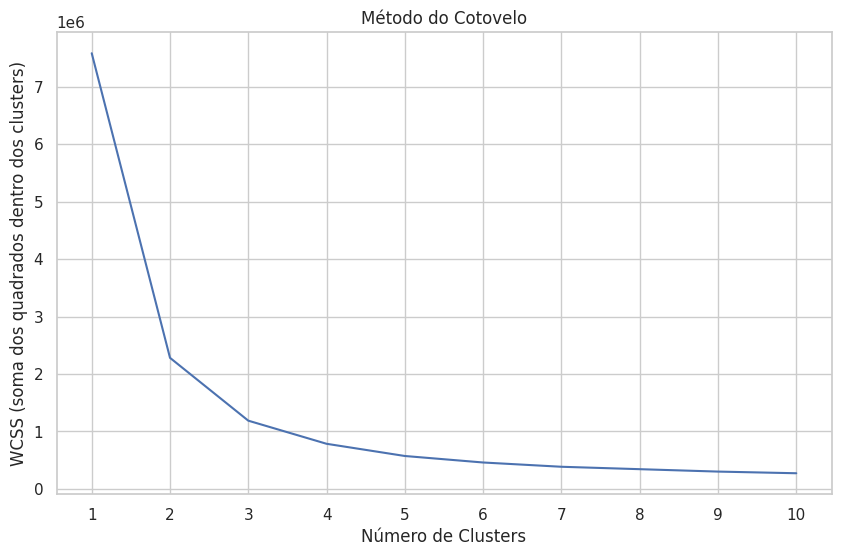

In [15]:
from sklearn.cluster import KMeans
import numpy as np


data_for_clustering = aggregated_data_clean.drop(['CustomerID', 'Country'], axis=1)


wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data_for_clustering)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS (soma dos quadrados dentro dos clusters)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


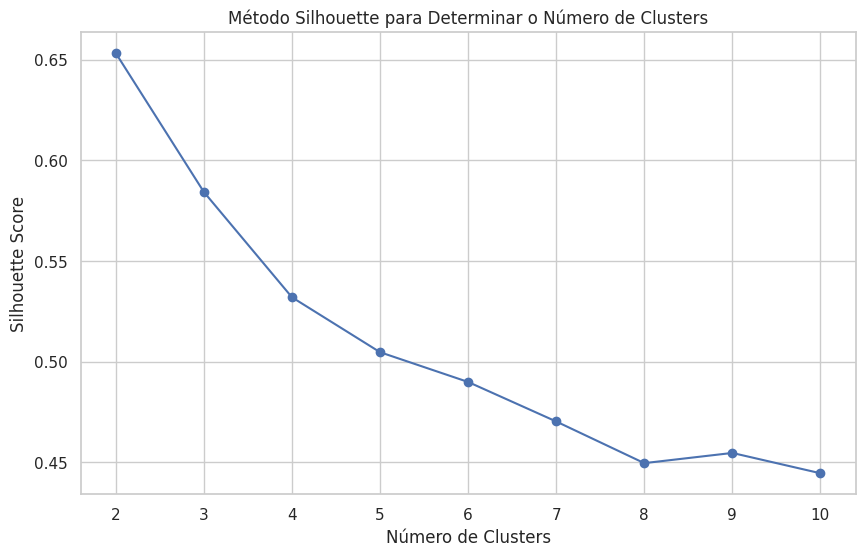

In [16]:
from sklearn.metrics import silhouette_score


silhouette_scores = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(data_for_clustering)
    silhouette_avg = silhouette_score(data_for_clustering, cluster_labels)
    silhouette_scores.append(silhouette_avg)


plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Método Silhouette para Determinar o Número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()


In [17]:

kmeans_final = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
cluster_labels = kmeans_final.fit_predict(data_for_clustering)

aggregated_data_clean['Cluster'] = cluster_labels


aggregated_data_clean.head()


<ipython-input-17-059eb209254c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aggregated_data_clean['Cluster'] = cluster_labels


,CustomerID,TotalQuantity,TotalSpend,PurchaseFrequency,ProductVariety,Country,Cluster
0,12347.0,90.396939,2.448977,7,103,Iceland,0
1,12348.0,16.378061,0.910525,4,22,Finland,1
2,12349.0,35.586735,1.546020,1,72,Italy,0
3,12350.0,8.427041,0.331010,1,17,Norway,1
4,12352.0,43.831633,2.682985,8,58,Norway,0


Cluster 0: Clientes de Alto Valor
Características:

Quantidade Total de Compras: Alta (média de 60.21), indicando que esses clientes compram uma quantidade significativa de produtos.
Gasto Total: Elevado (média de 1.69), mostrando que esses clientes contribuem significativamente para a receita da loja.
Frequência de Compras: Alta (média de 6.10 visitas únicas), o que sugere que esses clientes visitam e compram na loja com frequência.
Variedade de Produtos: Muito diversificada (média de 94.84 tipos de produtos diferentes comprados), indicando que esses clientes têm um amplo interesse nos diferentes produtos oferecidos pela loja.
Estratégias de Marketing Sugeridas:

Programas de fidelidade robustos para manter o engajamento e a satisfação.
Ofertas exclusivas e acesso antecipado a novos produtos para manter sua lealdade e interesse.
Eventos especiais ou experiências exclusivas como reconhecimento pela sua contribuição valiosa.
Cluster 1: Clientes Ocasionais
Características:

Quantidade Total de Compras: Baixa (média de 14.02), o que sugere compras mais pontuais ou de menor volume.
Gasto Total: Menor (média de 0.46), indicando que o valor médio por compra é relativamente baixo.
Frequência de Compras: Baixa (média de 2.57 visitas únicas), revelando que esses clientes visitam a loja esporadicamente.
Variedade de Produtos: Limitada (média de 24.01 tipos de produtos diferentes comprados), o que pode sugerir uma preferência por categorias específicas de produtos ou compras mais direcionadas.
Estratégias de Marketing Sugeridas:

Campanhas de marketing direcionadas para aumentar a frequência de suas visitas, talvez através de promoções sazonais ou ofertas por tempo limitado.
Recomendações personalizadas para ajudar a expandir o interesse em novas categorias de produtos.
Programas de incentivo que recompensem o aumento do volume e da frequência de compras.
